Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

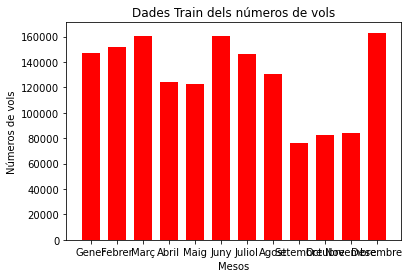

Gener       36479
Febrer      37832
Març        40252
Abril       31219
Maig        30606
Juny        40139
Juliol      36622
Agost       32531
Setembre    19225
Octubre     20873
Novembre    21188
Desembre    40386
Name: Month, dtype: int64


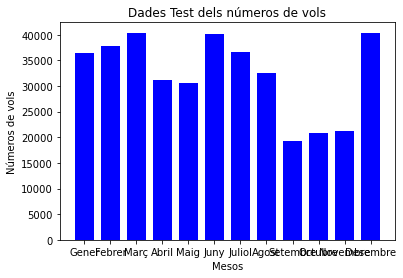

Dll    232752
Dm     209091
Dx     210063
Dj     231648
Dv     258249
Ds     178460
Dg     229143
Name: DayOfWeek, dtype: int64


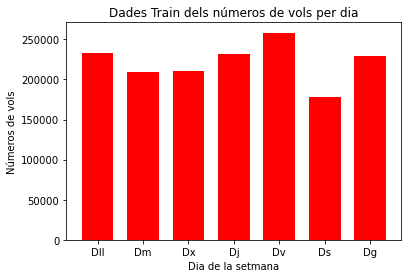

Dll    58181
Dm     51852
Dx     52742
Dj     57803
Dv     65010
Ds     44796
Dg     56968
Name: DayOfWeek, dtype: int64


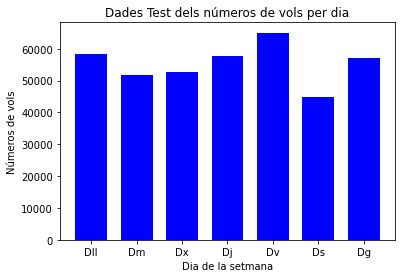

In [49]:
# Modul - 3
# M3 T01: Exercicis de training i test sets
# Exercici - 1
# Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Desactiva el Warning SettingWithCopyWarningsigue
pd.options.mode.chained_assignment = None # default='warn'

df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='latin1', dayfirst=True)


############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))

# La variable ArrDelay es la variable resposta (y), les altres son variables independents(X). 
# Les dades X tenen 28 variables
# La dade Y te 1 variable (ArrDelay). 
X, y = df.loc[:, df.columns != 'ArrDelay'], df.loc[:, df.columns == 'ArrDelay']
print(X.shape, y.shape)
print(X.columns, y.columns)


#################################### Dades de proves Train y test ####################################

# Carreguem les dades amb la funcio train_test_split de la llibreria sklearn.model_selection. 
# Dades de Test el 20%, el 80% per dades Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Dades de proves Train i Test , estudi a nivell descriptiu
print("Variable AirTime:\n")
print(X_train['AirTime'].describe(), X_test['AirTime'].describe())
print("Variable DepDelay:\n")
print(X_train['DepDelay'].describe(), X_test['DepDelay'].describe())
print("Variable ArrDelay:\n")
print(y_train['ArrDelay'].describe(), y_test['ArrDelay'].describe())

# Vols cancelats en las dades Train i Test
cancelats_X_train = X_train['Cancelled'].value_counts()
print("Vols cancelats Train:\n" + str(cancelats_X_train))

cancelats_X_test = X_test['Cancelled'].value_counts()
print("Vols cancelats Test:\n" + str(cancelats_X_test))


#################################### Gràfic de dades Train y test ####################################

# Gràfic de barres Trail. Per mesos/ Números de vols.
mes_X_train = X_train['Month'].value_counts(sort = False)
mes_X_train.index = ('Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre')
print(mes_X_train)
plt.bar(mes_X_train.index,mes_X_train.values,width=0.7,color='Red')
plt.xlabel("Mesos")
plt.ylabel("Números de vols")
plt.title("Dades Train dels números de vols")
plt.show()

# Gràfic de barres Test. Per mesos/ Números de vols.
mes_X_test = X_test['Month'].value_counts(sort = False)
mes_X_test.index = ('Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre')
print(mes_X_test)
plt.bar(mes_X_test.index,mes_X_test.values,width=0.7,color='Blue')
plt.xlabel("Mesos")
plt.ylabel("Números de vols")
plt.title("Dades Test dels números de vols")
plt.show()

# Gràfic de barres Trail. Dia de la setmana/ Números de vols.
dia_X_train = X_train['DayOfWeek'].value_counts(sort = False)
dia_X_train.index = ('Dll','Dm','Dx','Dj','Dv','Ds','Dg')
print(dia_X_train)
plt.bar(dia_X_train.index,dia_X_train.values,width=0.7,color='Red')
plt.xlabel("Dia de la setmana")
plt.ylabel("Números de vols")
plt.title("Dades Train dels números de vols per dia")
plt.show()

# Gràfic de barres Test. Dia de la setmana/ Números de vols.
dia_X_test = X_test['DayOfWeek'].value_counts(sort = False)
dia_X_test.index = ('Dll','Dm','Dx','Dj','Dv','Ds','Dg')
print(dia_X_test)
plt.bar(dia_X_test.index,dia_X_test.values,width=0.7,color='Blue')
plt.xlabel("Dia de la setmana")
plt.ylabel("Números de vols")
plt.title("Dades Test dels números de vols per dia")
plt.show()


In [51]:
# Exercici 2
# Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).
# Funcio per escalar dades StandardScaler de la llibreria sklearn.preprocessing

from sklearn.preprocessing import StandardScaler

# llista de columnes a escalar
cols_to_scale = ['AirTime','DepDelay']

# Creem i ajustem l'escala de dades Train
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])
# Dades Train seleccionades 
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

# Creem i ajustem l'escala de dades Test
scaler = StandardScaler()
scaler.fit(X_test[cols_to_scale])
# Dades Test seleccionades 
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# Creem columnes de prova
X_train.cancel = X_train[X_train['Cancelled'] == 1]
code_cancel = X_train.cancel['CancellationCode'].value_counts()
dadeProva = pd.get_dummies(X_train.cancel['CancellationCode'])

X_train.cancel2 = pd.concat([X_train.cancel, dadeProva], axis = 1)
print ("Head:\n" + str(X_train.cancel2.head()))



Head:
         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1661603     6108371  2008     11          30          7   1649.0        1400   
1778995     6569741  2008     12          14          7   1530.0        1440   
1872255     6834458  2008     12          24          3   1155.0        1020   
1911520     6946140  2008     12           8          1   1105.0         720   
1548271     5491819  2008     10          15          3   1943.0        1745   

         ArrTime  CRSArrTime UniqueCarrier  ...  CancellationCode Diverted  \
1661603      NaN        1452            OO  ...                 B        0   
1778995      NaN        1542            XE  ...                 A        0   
1872255      NaN        1210            MQ  ...                 A        0   
1911520      NaN        1110            AS  ...                 A        0   
1548271      NaN        1857            XE  ...                 B        0   

         CarrierDelay  WeatherDelay  NASDela

count    1.542731e+06
mean    -1.402146e-16
std      1.000000e+00
min     -1.577833e+00
25%     -7.326668e-01
50%     -2.663683e-01
75%      4.185076e-01
max      8.097861e+00
Name: AirTime, dtype: float64 count    3.856400e+05
mean     1.734601e-17
std      1.000001e+00
min     -1.546588e+00
25%     -7.315756e-01
50%     -2.658545e-01
75%      4.181734e-01
max      1.430248e+01
Name: AirTime, dtype: float64


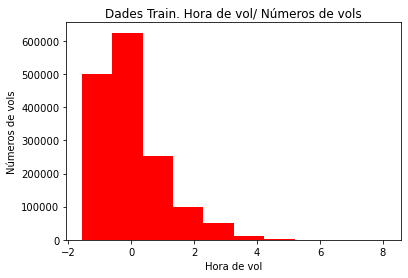

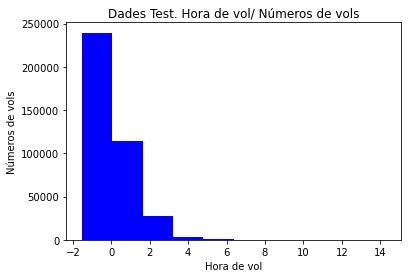

Describe 'DepDelay':

count    1.549406e+06
mean    -6.996764e-18
std      1.000000e+00
min     -6.967865e-01
25%     -5.843260e-01
50%     -3.594049e-01
75%      1.841542e-01
max      4.543076e+01
Name: DepDelay, dtype: float64 count    3.873520e+05
mean     9.486016e-17
std      1.000001e+00
min     -6.944652e-01
25%     -5.825326e-01
50%     -3.586674e-01
75%      1.823400e-01
max      3.560900e+01
Name: DepDelay, dtype: float64


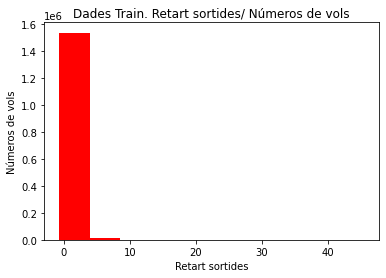

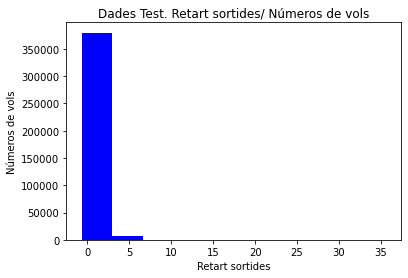

Agrupacio de vols cancel·lats Train':

A    194
B    253
C     60
dtype: int64


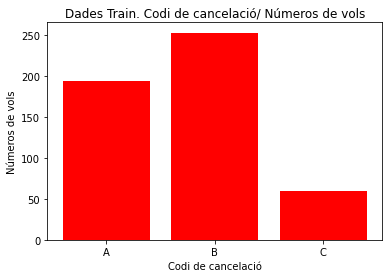

In [62]:
# Exercici 3
# Resumeix les noves columnes generades de manera estadística i gràfica

print(X_train['AirTime'].describe(), X_test['AirTime'].describe())


#################################### Gràfic de dades Train y test ####################################

# Gràfic de barres Trail. Hora de vol/ Números de vols.
plt.hist(X_train['AirTime'],color='Red')
plt.xlabel("Hora de vol")
plt.ylabel("Números de vols")
plt.title("Dades Train. Hora de vol/ Números de vols")
plt.show()

# Gràfic de barres Test. Hora de vol/ Números de vols.
plt.hist(X_test['AirTime'],color='Blue')
plt.xlabel("Hora de vol")
plt.ylabel("Números de vols")
plt.title("Dades Test. Hora de vol/ Números de vols")
plt.show()

print ("Describe 'DepDelay':\n")
print(X_train['DepDelay'].describe(), X_test['DepDelay'].describe())

# Gràfic de barres Trail. Retart sortides/ Números de vols.
plt.hist(X_train['DepDelay'],color='Red')
plt.xlabel("Retart sortides")
plt.ylabel("Números de vols")
plt.title("Dades Train. Retart sortides/ Números de vols")
plt.show()

# Gràfic de barres Test. Retart sortides/ Números de vols.
plt.hist(X_test['DepDelay'],color='Blue')
plt.xlabel("Retart sortides")
plt.ylabel("Números de vols")
plt.title("Dades Test. Retart sortides/ Números de vols")
plt.show()

# Agrupacio de vols cancel·lats
aggregations={
    'A':sum,
    'B':sum,
    'C':sum,
             }
X_train.cancel2.grups = X_train.cancel2.agg(aggregations)
print ("Agrupacio de vols cancel·lats Train':\n")
print (X_train.cancel2.grups)


# Gràfic de barres Train. Codi de cancelació/ Números de vols.
plt.bar(X_train.cancel2.grups.index,X_train.cancel2.grups.values,color='Red')
plt.xlabel("Codi de cancelació")
plt.ylabel("Números de vols")
plt.title("Dades Train. Codi de cancelació/ Números de vols")
plt.show()